## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.343592  1151.662264  0.073531  1.969609  1.490130
1  92.986625   280.534312  0.663821  9.437256  1.167698
2   3.292484   458.156794  0.699808  6.896073  1.562459
3  73.618978  1329.221170  0.106223  1.696330  1.164698
4  58.086411   263.307705  0.685437  1.602459  1.468774


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.87754 | train_mse: 4.6736  | train_mae: 1.60248 |  0:00:00s
epoch 1  | loss: 1.05118 | train_mse: 3.16243 | train_mae: 1.38033 |  0:00:00s
epoch 2  | loss: 0.83557 | train_mse: 2.55961 | train_mae: 1.23088 |  0:00:00s


epoch 3  | loss: 0.83695 | train_mse: 1.93316 | train_mae: 1.07263 |  0:00:00s
epoch 4  | loss: 0.66402 | train_mse: 1.60122 | train_mae: 0.98306 |  0:00:00s
epoch 5  | loss: 0.75511 | train_mse: 1.38883 | train_mae: 0.91598 |  0:00:00s


epoch 6  | loss: 0.54243 | train_mse: 1.21988 | train_mae: 0.85346 |  0:00:00s
epoch 7  | loss: 0.63465 | train_mse: 1.10259 | train_mae: 0.81949 |  0:00:00s


epoch 8  | loss: 0.63415 | train_mse: 0.97745 | train_mae: 0.76648 |  0:00:01s
epoch 9  | loss: 0.6141  | train_mse: 0.86865 | train_mae: 0.72796 |  0:00:01s
epoch 10 | loss: 0.73079 | train_mse: 0.78651 | train_mae: 0.70031 |  0:00:01s


epoch 11 | loss: 0.53398 | train_mse: 0.71492 | train_mae: 0.6733  |  0:00:01s
epoch 12 | loss: 0.4986  | train_mse: 0.66142 | train_mae: 0.64959 |  0:00:01s
epoch 13 | loss: 0.61708 | train_mse: 0.62276 | train_mae: 0.63188 |  0:00:01s


epoch 14 | loss: 0.41999 | train_mse: 0.58805 | train_mae: 0.61186 |  0:00:01s
epoch 15 | loss: 0.49812 | train_mse: 0.55896 | train_mae: 0.59062 |  0:00:01s
epoch 16 | loss: 0.40019 | train_mse: 0.53361 | train_mae: 0.57583 |  0:00:01s


epoch 17 | loss: 0.40038 | train_mse: 0.507   | train_mae: 0.56025 |  0:00:01s
epoch 18 | loss: 0.52087 | train_mse: 0.49676 | train_mae: 0.55495 |  0:00:02s
epoch 19 | loss: 0.52382 | train_mse: 0.48264 | train_mae: 0.54666 |  0:00:02s


epoch 20 | loss: 0.47731 | train_mse: 0.48531 | train_mae: 0.54295 |  0:00:02s
epoch 21 | loss: 0.45181 | train_mse: 0.48868 | train_mae: 0.53958 |  0:00:02s
epoch 22 | loss: 0.36811 | train_mse: 0.4803  | train_mae: 0.52932 |  0:00:02s


epoch 23 | loss: 0.33587 | train_mse: 0.47312 | train_mae: 0.52517 |  0:00:02s
epoch 24 | loss: 0.30881 | train_mse: 0.46313 | train_mae: 0.52318 |  0:00:02s
epoch 25 | loss: 0.4124  | train_mse: 0.46089 | train_mae: 0.52644 |  0:00:02s


epoch 26 | loss: 0.34361 | train_mse: 0.45439 | train_mae: 0.52532 |  0:00:02s
epoch 27 | loss: 0.45687 | train_mse: 0.45334 | train_mae: 0.52292 |  0:00:02s


epoch 28 | loss: 0.39495 | train_mse: 0.44236 | train_mae: 0.51498 |  0:00:03s
epoch 29 | loss: 0.48358 | train_mse: 0.42681 | train_mae: 0.50369 |  0:00:03s


epoch 30 | loss: 0.30794 | train_mse: 0.40706 | train_mae: 0.48992 |  0:00:03s
epoch 31 | loss: 0.26694 | train_mse: 0.38288 | train_mae: 0.4757  |  0:00:03s


epoch 32 | loss: 0.32493 | train_mse: 0.3547  | train_mae: 0.46091 |  0:00:03s
epoch 33 | loss: 0.31291 | train_mse: 0.3474  | train_mae: 0.45842 |  0:00:03s


epoch 34 | loss: 0.3464  | train_mse: 0.34452 | train_mae: 0.45798 |  0:00:03s
epoch 35 | loss: 0.25877 | train_mse: 0.33761 | train_mae: 0.45259 |  0:00:04s


epoch 36 | loss: 0.35361 | train_mse: 0.33733 | train_mae: 0.45176 |  0:00:04s
epoch 37 | loss: 0.45527 | train_mse: 0.32789 | train_mae: 0.44229 |  0:00:04s


epoch 38 | loss: 0.3108  | train_mse: 0.31909 | train_mae: 0.43116 |  0:00:04s
epoch 39 | loss: 0.38069 | train_mse: 0.30663 | train_mae: 0.4235  |  0:00:04s


epoch 40 | loss: 0.297   | train_mse: 0.3003  | train_mae: 0.41708 |  0:00:04s
epoch 41 | loss: 0.31264 | train_mse: 0.29299 | train_mae: 0.41285 |  0:00:04s


epoch 42 | loss: 0.24555 | train_mse: 0.28949 | train_mae: 0.40943 |  0:00:05s
epoch 43 | loss: 0.43869 | train_mse: 0.27836 | train_mae: 0.40186 |  0:00:05s


epoch 44 | loss: 0.31702 | train_mse: 0.25635 | train_mae: 0.39073 |  0:00:05s
epoch 45 | loss: 0.30351 | train_mse: 0.24111 | train_mae: 0.37902 |  0:00:05s


epoch 46 | loss: 0.38727 | train_mse: 0.24034 | train_mae: 0.37567 |  0:00:05s
epoch 47 | loss: 0.30119 | train_mse: 0.24039 | train_mae: 0.37475 |  0:00:05s


epoch 48 | loss: 0.3852  | train_mse: 0.23892 | train_mae: 0.37342 |  0:00:05s
epoch 49 | loss: 0.33642 | train_mse: 0.23213 | train_mae: 0.37031 |  0:00:05s


epoch 50 | loss: 0.31919 | train_mse: 0.22051 | train_mae: 0.35886 |  0:00:06s
epoch 51 | loss: 0.33502 | train_mse: 0.2114  | train_mae: 0.34977 |  0:00:06s
epoch 52 | loss: 0.40367 | train_mse: 0.20556 | train_mae: 0.34601 |  0:00:06s


epoch 53 | loss: 0.24165 | train_mse: 0.19826 | train_mae: 0.3376  |  0:00:06s
epoch 54 | loss: 0.35032 | train_mse: 0.19239 | train_mae: 0.32836 |  0:00:06s
epoch 55 | loss: 0.34095 | train_mse: 0.19062 | train_mae: 0.32258 |  0:00:06s


epoch 56 | loss: 0.30073 | train_mse: 0.1912  | train_mae: 0.32274 |  0:00:06s
epoch 57 | loss: 0.37364 | train_mse: 0.19187 | train_mae: 0.32166 |  0:00:06s
epoch 58 | loss: 0.26746 | train_mse: 0.1913  | train_mae: 0.32145 |  0:00:06s


epoch 59 | loss: 0.33025 | train_mse: 0.19151 | train_mae: 0.32035 |  0:00:06s
epoch 60 | loss: 0.25813 | train_mse: 0.19422 | train_mae: 0.31957 |  0:00:07s
epoch 61 | loss: 0.25953 | train_mse: 0.19947 | train_mae: 0.32025 |  0:00:07s


epoch 62 | loss: 0.29772 | train_mse: 0.19563 | train_mae: 0.31856 |  0:00:07s
epoch 63 | loss: 0.29697 | train_mse: 0.19141 | train_mae: 0.31777 |  0:00:07s
epoch 64 | loss: 0.30085 | train_mse: 0.19174 | train_mae: 0.31766 |  0:00:07s


epoch 65 | loss: 0.32253 | train_mse: 0.19575 | train_mae: 0.31934 |  0:00:07s
epoch 66 | loss: 0.31483 | train_mse: 0.19528 | train_mae: 0.31479 |  0:00:07s
epoch 67 | loss: 0.28642 | train_mse: 0.19429 | train_mae: 0.31217 |  0:00:07s


epoch 68 | loss: 0.41265 | train_mse: 0.19413 | train_mae: 0.31281 |  0:00:07s
epoch 69 | loss: 0.26552 | train_mse: 0.19468 | train_mae: 0.31266 |  0:00:07s


epoch 70 | loss: 0.2277  | train_mse: 0.19004 | train_mae: 0.30877 |  0:00:07s
epoch 71 | loss: 0.32558 | train_mse: 0.18966 | train_mae: 0.30512 |  0:00:08s


epoch 72 | loss: 0.26364 | train_mse: 0.1855  | train_mae: 0.29936 |  0:00:08s
epoch 73 | loss: 0.27853 | train_mse: 0.18125 | train_mae: 0.29517 |  0:00:08s


epoch 74 | loss: 0.21864 | train_mse: 0.17809 | train_mae: 0.29646 |  0:00:08s
epoch 75 | loss: 0.31601 | train_mse: 0.17741 | train_mae: 0.29774 |  0:00:08s
epoch 76 | loss: 0.31572 | train_mse: 0.17519 | train_mae: 0.29919 |  0:00:08s


epoch 77 | loss: 0.28855 | train_mse: 0.16924 | train_mae: 0.29331 |  0:00:08s
epoch 78 | loss: 0.27392 | train_mse: 0.16268 | train_mae: 0.28736 |  0:00:08s


epoch 79 | loss: 0.20574 | train_mse: 0.15591 | train_mae: 0.28212 |  0:00:08s
epoch 80 | loss: 0.25659 | train_mse: 0.15141 | train_mae: 0.28296 |  0:00:08s
epoch 81 | loss: 0.35545 | train_mse: 0.15205 | train_mae: 0.28329 |  0:00:09s


epoch 82 | loss: 0.22029 | train_mse: 0.15145 | train_mae: 0.28106 |  0:00:09s
epoch 83 | loss: 0.19538 | train_mse: 0.15167 | train_mae: 0.28072 |  0:00:09s
epoch 84 | loss: 0.23356 | train_mse: 0.15023 | train_mae: 0.28532 |  0:00:09s


epoch 85 | loss: 0.32369 | train_mse: 0.15006 | train_mae: 0.29124 |  0:00:09s
epoch 86 | loss: 0.36736 | train_mse: 0.14952 | train_mae: 0.29201 |  0:00:09s
epoch 87 | loss: 0.26306 | train_mse: 0.14642 | train_mae: 0.28541 |  0:00:09s


epoch 88 | loss: 0.31513 | train_mse: 0.14677 | train_mae: 0.28161 |  0:00:09s
epoch 89 | loss: 0.29553 | train_mse: 0.14515 | train_mae: 0.28097 |  0:00:09s


epoch 90 | loss: 0.34095 | train_mse: 0.14403 | train_mae: 0.2789  |  0:00:09s
epoch 91 | loss: 0.13647 | train_mse: 0.14693 | train_mae: 0.28165 |  0:00:09s
epoch 92 | loss: 0.2872  | train_mse: 0.15088 | train_mae: 0.28614 |  0:00:10s


epoch 93 | loss: 0.30261 | train_mse: 0.15464 | train_mae: 0.28601 |  0:00:10s
epoch 94 | loss: 0.26903 | train_mse: 0.1543  | train_mae: 0.28681 |  0:00:10s
epoch 95 | loss: 0.21431 | train_mse: 0.15138 | train_mae: 0.28524 |  0:00:10s


epoch 96 | loss: 0.29025 | train_mse: 0.14917 | train_mae: 0.28109 |  0:00:10s
epoch 97 | loss: 0.26572 | train_mse: 0.14463 | train_mae: 0.2726  |  0:00:10s
epoch 98 | loss: 0.23141 | train_mse: 0.14292 | train_mae: 0.2718  |  0:00:10s


epoch 99 | loss: 0.22598 | train_mse: 0.14039 | train_mae: 0.27373 |  0:00:10s
epoch 100| loss: 0.24431 | train_mse: 0.14137 | train_mae: 0.27429 |  0:00:10s


epoch 101| loss: 0.26521 | train_mse: 0.14386 | train_mae: 0.27585 |  0:00:10s
epoch 102| loss: 0.17731 | train_mse: 0.14592 | train_mae: 0.27316 |  0:00:10s
epoch 103| loss: 0.27232 | train_mse: 0.14596 | train_mae: 0.27453 |  0:00:11s


epoch 104| loss: 0.26946 | train_mse: 0.14454 | train_mae: 0.27573 |  0:00:11s
epoch 105| loss: 0.24493 | train_mse: 0.14334 | train_mae: 0.27512 |  0:00:11s
epoch 106| loss: 0.25576 | train_mse: 0.14228 | train_mae: 0.27721 |  0:00:11s


epoch 107| loss: 0.28791 | train_mse: 0.14307 | train_mae: 0.27662 |  0:00:11s
epoch 108| loss: 0.31314 | train_mse: 0.14361 | train_mae: 0.27689 |  0:00:11s
epoch 109| loss: 0.27475 | train_mse: 0.1447  | train_mae: 0.2781  |  0:00:11s


epoch 110| loss: 0.22998 | train_mse: 0.15303 | train_mae: 0.279   |  0:00:11s
epoch 111| loss: 0.22772 | train_mse: 0.15429 | train_mae: 0.27541 |  0:00:11s
epoch 112| loss: 0.31835 | train_mse: 0.15358 | train_mae: 0.27394 |  0:00:11s


epoch 113| loss: 0.19787 | train_mse: 0.15351 | train_mae: 0.27544 |  0:00:11s
epoch 114| loss: 0.2052  | train_mse: 0.15648 | train_mae: 0.27875 |  0:00:12s
epoch 115| loss: 0.20823 | train_mse: 0.15757 | train_mae: 0.27818 |  0:00:12s


epoch 116| loss: 0.21604 | train_mse: 0.15685 | train_mae: 0.27922 |  0:00:12s
epoch 117| loss: 0.34679 | train_mse: 0.16048 | train_mae: 0.28156 |  0:00:12s
epoch 118| loss: 0.29096 | train_mse: 0.15795 | train_mae: 0.28551 |  0:00:12s


epoch 119| loss: 0.23466 | train_mse: 0.15079 | train_mae: 0.28122 |  0:00:12s
epoch 120| loss: 0.27401 | train_mse: 0.14905 | train_mae: 0.28023 |  0:00:12s
epoch 121| loss: 0.16932 | train_mse: 0.1505  | train_mae: 0.27927 |  0:00:12s


epoch 122| loss: 0.21976 | train_mse: 0.15105 | train_mae: 0.27648 |  0:00:12s
epoch 123| loss: 0.29626 | train_mse: 0.14929 | train_mae: 0.2728  |  0:00:12s
epoch 124| loss: 0.23368 | train_mse: 0.1486  | train_mae: 0.27191 |  0:00:13s


epoch 125| loss: 0.27683 | train_mse: 0.14294 | train_mae: 0.27112 |  0:00:13s
epoch 126| loss: 0.22109 | train_mse: 0.14101 | train_mae: 0.26868 |  0:00:13s
epoch 127| loss: 0.18926 | train_mse: 0.13938 | train_mae: 0.26855 |  0:00:13s


epoch 128| loss: 0.22798 | train_mse: 0.13918 | train_mae: 0.27042 |  0:00:13s
epoch 129| loss: 0.27611 | train_mse: 0.13601 | train_mae: 0.27239 |  0:00:13s


epoch 130| loss: 0.479   | train_mse: 0.13475 | train_mae: 0.27326 |  0:00:13s
epoch 131| loss: 0.22404 | train_mse: 0.1324  | train_mae: 0.27334 |  0:00:13s
epoch 132| loss: 0.24262 | train_mse: 0.13787 | train_mae: 0.27976 |  0:00:13s


epoch 133| loss: 0.29665 | train_mse: 0.13833 | train_mae: 0.28019 |  0:00:13s
epoch 134| loss: 0.19952 | train_mse: 0.13765 | train_mae: 0.27831 |  0:00:14s
epoch 135| loss: 0.21667 | train_mse: 0.1342  | train_mae: 0.27601 |  0:00:14s


epoch 136| loss: 0.32602 | train_mse: 0.12988 | train_mae: 0.27456 |  0:00:14s
epoch 137| loss: 0.20126 | train_mse: 0.12819 | train_mae: 0.27091 |  0:00:14s
epoch 138| loss: 0.29662 | train_mse: 0.12674 | train_mae: 0.27273 |  0:00:14s


epoch 139| loss: 0.26849 | train_mse: 0.12821 | train_mae: 0.27312 |  0:00:14s
epoch 140| loss: 0.19353 | train_mse: 0.12514 | train_mae: 0.27255 |  0:00:14s
epoch 141| loss: 0.20574 | train_mse: 0.12471 | train_mae: 0.27127 |  0:00:14s


epoch 142| loss: 0.18433 | train_mse: 0.12442 | train_mae: 0.27141 |  0:00:14s
epoch 143| loss: 0.17098 | train_mse: 0.12375 | train_mae: 0.27034 |  0:00:14s


epoch 144| loss: 0.141   | train_mse: 0.12418 | train_mae: 0.26872 |  0:00:14s
epoch 145| loss: 0.1959  | train_mse: 0.12477 | train_mae: 0.26453 |  0:00:15s
epoch 146| loss: 0.29654 | train_mse: 0.12577 | train_mae: 0.26503 |  0:00:15s


epoch 147| loss: 0.18729 | train_mse: 0.1239  | train_mae: 0.26278 |  0:00:15s
epoch 148| loss: 0.18627 | train_mse: 0.12446 | train_mae: 0.26355 |  0:00:15s
epoch 149| loss: 0.30214 | train_mse: 0.12458 | train_mae: 0.26384 |  0:00:15s


epoch 150| loss: 0.18793 | train_mse: 0.12586 | train_mae: 0.26601 |  0:00:15s
epoch 151| loss: 0.22877 | train_mse: 0.12521 | train_mae: 0.26505 |  0:00:15s
epoch 152| loss: 0.21926 | train_mse: 0.1226  | train_mae: 0.26181 |  0:00:15s


epoch 153| loss: 0.17238 | train_mse: 0.11966 | train_mae: 0.25497 |  0:00:15s
epoch 154| loss: 0.24668 | train_mse: 0.11853 | train_mae: 0.24986 |  0:00:15s


epoch 155| loss: 0.27346 | train_mse: 0.11779 | train_mae: 0.24683 |  0:00:15s
epoch 156| loss: 0.22878 | train_mse: 0.11953 | train_mae: 0.24959 |  0:00:16s
epoch 157| loss: 0.17458 | train_mse: 0.11863 | train_mae: 0.2474  |  0:00:16s


epoch 158| loss: 0.2604  | train_mse: 0.11759 | train_mae: 0.24643 |  0:00:16s
epoch 159| loss: 0.25027 | train_mse: 0.11519 | train_mae: 0.24711 |  0:00:16s
epoch 160| loss: 0.28184 | train_mse: 0.11392 | train_mae: 0.24952 |  0:00:16s


epoch 161| loss: 0.22594 | train_mse: 0.11327 | train_mae: 0.25097 |  0:00:16s
epoch 162| loss: 0.14335 | train_mse: 0.1139  | train_mae: 0.25213 |  0:00:16s
epoch 163| loss: 0.2202  | train_mse: 0.11342 | train_mae: 0.25149 |  0:00:16s


epoch 164| loss: 0.20328 | train_mse: 0.11294 | train_mae: 0.25348 |  0:00:16s
epoch 165| loss: 0.21262 | train_mse: 0.11113 | train_mae: 0.25395 |  0:00:16s
epoch 166| loss: 0.23782 | train_mse: 0.1101  | train_mae: 0.25494 |  0:00:17s


epoch 167| loss: 0.16496 | train_mse: 0.11016 | train_mae: 0.25794 |  0:00:17s
epoch 168| loss: 0.31741 | train_mse: 0.10967 | train_mae: 0.25904 |  0:00:17s
epoch 169| loss: 0.25642 | train_mse: 0.10969 | train_mae: 0.26098 |  0:00:17s


epoch 170| loss: 0.18961 | train_mse: 0.11045 | train_mae: 0.26152 |  0:00:17s
epoch 171| loss: 0.15415 | train_mse: 0.11067 | train_mae: 0.25994 |  0:00:17s
epoch 172| loss: 0.14007 | train_mse: 0.11068 | train_mae: 0.25674 |  0:00:17s


epoch 173| loss: 0.24844 | train_mse: 0.11277 | train_mae: 0.25565 |  0:00:17s
epoch 174| loss: 0.27804 | train_mse: 0.1134  | train_mae: 0.25496 |  0:00:17s


epoch 175| loss: 0.15895 | train_mse: 0.11301 | train_mae: 0.25311 |  0:00:17s
epoch 176| loss: 0.27813 | train_mse: 0.11299 | train_mae: 0.25047 |  0:00:17s
epoch 177| loss: 0.19322 | train_mse: 0.11326 | train_mae: 0.25015 |  0:00:18s


epoch 178| loss: 0.245   | train_mse: 0.11588 | train_mae: 0.25136 |  0:00:18s
epoch 179| loss: 0.15614 | train_mse: 0.11522 | train_mae: 0.25141 |  0:00:18s
epoch 180| loss: 0.16021 | train_mse: 0.11514 | train_mae: 0.25119 |  0:00:18s


epoch 181| loss: 0.18351 | train_mse: 0.11825 | train_mae: 0.25499 |  0:00:18s
epoch 182| loss: 0.20898 | train_mse: 0.11669 | train_mae: 0.25627 |  0:00:18s
epoch 183| loss: 0.21006 | train_mse: 0.11775 | train_mae: 0.25994 |  0:00:18s


epoch 184| loss: 0.14019 | train_mse: 0.11718 | train_mae: 0.26282 |  0:00:18s
epoch 185| loss: 0.28616 | train_mse: 0.11929 | train_mae: 0.2669  |  0:00:18s


epoch 186| loss: 0.17118 | train_mse: 0.11857 | train_mae: 0.2647  |  0:00:18s
epoch 187| loss: 0.22761 | train_mse: 0.1124  | train_mae: 0.26347 |  0:00:18s
epoch 188| loss: 0.24073 | train_mse: 0.10948 | train_mae: 0.25803 |  0:00:19s


epoch 189| loss: 0.14987 | train_mse: 0.10516 | train_mae: 0.2539  |  0:00:19s
epoch 190| loss: 0.16058 | train_mse: 0.10387 | train_mae: 0.249   |  0:00:19s
epoch 191| loss: 0.25804 | train_mse: 0.10275 | train_mae: 0.24633 |  0:00:19s


epoch 192| loss: 0.2617  | train_mse: 0.10332 | train_mae: 0.24619 |  0:00:19s
epoch 193| loss: 0.19847 | train_mse: 0.10529 | train_mae: 0.24891 |  0:00:19s
epoch 194| loss: 0.41079 | train_mse: 0.10442 | train_mae: 0.25067 |  0:00:19s


epoch 195| loss: 0.17498 | train_mse: 0.10511 | train_mae: 0.25298 |  0:00:19s
epoch 196| loss: 0.18621 | train_mse: 0.10492 | train_mae: 0.25366 |  0:00:19s


epoch 197| loss: 0.15306 | train_mse: 0.10559 | train_mae: 0.25458 |  0:00:19s
epoch 198| loss: 0.17867 | train_mse: 0.10369 | train_mae: 0.25196 |  0:00:20s
epoch 199| loss: 0.11982 | train_mse: 0.09917 | train_mae: 0.24908 |  0:00:20s


epoch 200| loss: 0.16391 | train_mse: 0.09502 | train_mae: 0.24347 |  0:00:20s
epoch 201| loss: 0.22011 | train_mse: 0.09448 | train_mae: 0.23856 |  0:00:20s
epoch 202| loss: 0.19009 | train_mse: 0.09731 | train_mae: 0.23754 |  0:00:20s


epoch 203| loss: 0.21389 | train_mse: 0.09909 | train_mae: 0.23554 |  0:00:20s
epoch 204| loss: 0.1804  | train_mse: 0.10119 | train_mae: 0.23392 |  0:00:20s
epoch 205| loss: 0.27609 | train_mse: 0.10335 | train_mae: 0.23312 |  0:00:20s


epoch 206| loss: 0.19118 | train_mse: 0.10268 | train_mae: 0.2306  |  0:00:20s
epoch 207| loss: 0.27898 | train_mse: 0.10653 | train_mae: 0.23266 |  0:00:20s


epoch 208| loss: 0.26181 | train_mse: 0.10942 | train_mae: 0.23675 |  0:00:21s
epoch 209| loss: 0.16572 | train_mse: 0.11434 | train_mae: 0.24201 |  0:00:21s
epoch 210| loss: 0.23596 | train_mse: 0.11634 | train_mae: 0.24464 |  0:00:21s


epoch 211| loss: 0.1499  | train_mse: 0.11744 | train_mae: 0.247   |  0:00:21s
epoch 212| loss: 0.22041 | train_mse: 0.116   | train_mae: 0.2456  |  0:00:21s
epoch 213| loss: 0.23372 | train_mse: 0.11623 | train_mae: 0.24167 |  0:00:21s


epoch 214| loss: 0.11891 | train_mse: 0.11713 | train_mae: 0.23992 |  0:00:21s
epoch 215| loss: 0.1664  | train_mse: 0.11079 | train_mae: 0.2355  |  0:00:21s
epoch 216| loss: 0.16159 | train_mse: 0.10882 | train_mae: 0.23515 |  0:00:21s


epoch 217| loss: 0.1777  | train_mse: 0.10323 | train_mae: 0.23417 |  0:00:21s
epoch 218| loss: 0.27658 | train_mse: 0.09876 | train_mae: 0.23461 |  0:00:21s


epoch 219| loss: 0.23448 | train_mse: 0.10113 | train_mae: 0.23854 |  0:00:22s
epoch 220| loss: 0.13261 | train_mse: 0.10227 | train_mae: 0.23967 |  0:00:22s
epoch 221| loss: 0.23098 | train_mse: 0.10418 | train_mae: 0.24076 |  0:00:22s


epoch 222| loss: 0.32503 | train_mse: 0.10553 | train_mae: 0.24203 |  0:00:22s
epoch 223| loss: 0.20276 | train_mse: 0.10697 | train_mae: 0.24199 |  0:00:22s
epoch 224| loss: 0.20085 | train_mse: 0.10772 | train_mae: 0.24096 |  0:00:22s


epoch 225| loss: 0.15845 | train_mse: 0.10619 | train_mae: 0.24069 |  0:00:22s
epoch 226| loss: 0.15073 | train_mse: 0.1043  | train_mae: 0.24282 |  0:00:22s
epoch 227| loss: 0.15838 | train_mse: 0.10287 | train_mae: 0.24337 |  0:00:22s


epoch 228| loss: 0.17064 | train_mse: 0.10256 | train_mae: 0.2443  |  0:00:22s
epoch 229| loss: 0.12786 | train_mse: 0.10014 | train_mae: 0.24327 |  0:00:23s
epoch 230| loss: 0.23074 | train_mse: 0.0999  | train_mae: 0.24198 |  0:00:23s


epoch 231| loss: 0.20004 | train_mse: 0.09815 | train_mae: 0.24102 |  0:00:23s
epoch 232| loss: 0.13242 | train_mse: 0.09799 | train_mae: 0.24191 |  0:00:23s
epoch 233| loss: 0.15857 | train_mse: 0.09952 | train_mae: 0.24258 |  0:00:23s


epoch 234| loss: 0.16872 | train_mse: 0.09974 | train_mae: 0.24153 |  0:00:23s
epoch 235| loss: 0.29928 | train_mse: 0.09798 | train_mae: 0.23805 |  0:00:23s
epoch 236| loss: 0.17183 | train_mse: 0.10055 | train_mae: 0.23854 |  0:00:23s


epoch 237| loss: 0.14921 | train_mse: 0.0989  | train_mae: 0.23512 |  0:00:23s
epoch 238| loss: 0.18379 | train_mse: 0.10161 | train_mae: 0.23234 |  0:00:23s


epoch 239| loss: 0.16074 | train_mse: 0.10535 | train_mae: 0.23143 |  0:00:23s
epoch 240| loss: 0.15717 | train_mse: 0.10692 | train_mae: 0.23056 |  0:00:23s
epoch 241| loss: 0.1544  | train_mse: 0.10348 | train_mae: 0.22714 |  0:00:24s


epoch 242| loss: 0.19896 | train_mse: 0.10464 | train_mae: 0.22705 |  0:00:24s
epoch 243| loss: 0.14305 | train_mse: 0.09885 | train_mae: 0.22705 |  0:00:24s
epoch 244| loss: 0.14564 | train_mse: 0.0942  | train_mae: 0.22801 |  0:00:24s


epoch 245| loss: 0.13361 | train_mse: 0.0942  | train_mae: 0.22802 |  0:00:24s
epoch 246| loss: 0.15634 | train_mse: 0.09033 | train_mae: 0.22649 |  0:00:24s
epoch 247| loss: 0.14471 | train_mse: 0.08933 | train_mae: 0.22827 |  0:00:24s


epoch 248| loss: 0.17587 | train_mse: 0.08657 | train_mae: 0.22672 |  0:00:24s
epoch 249| loss: 0.12455 | train_mse: 0.0845  | train_mae: 0.22321 |  0:00:24s


epoch 250| loss: 0.1192  | train_mse: 0.08326 | train_mae: 0.2222  |  0:00:24s
epoch 251| loss: 0.19111 | train_mse: 0.08183 | train_mae: 0.21858 |  0:00:25s
epoch 252| loss: 0.15691 | train_mse: 0.0811  | train_mae: 0.21676 |  0:00:25s


epoch 253| loss: 0.10102 | train_mse: 0.08119 | train_mae: 0.21874 |  0:00:25s
epoch 254| loss: 0.21922 | train_mse: 0.08056 | train_mae: 0.21795 |  0:00:25s
epoch 255| loss: 0.14695 | train_mse: 0.07938 | train_mae: 0.21558 |  0:00:25s


epoch 256| loss: 0.22468 | train_mse: 0.07888 | train_mae: 0.2152  |  0:00:25s
epoch 257| loss: 0.21715 | train_mse: 0.08113 | train_mae: 0.21686 |  0:00:25s
epoch 258| loss: 0.11431 | train_mse: 0.08264 | train_mae: 0.21865 |  0:00:25s


epoch 259| loss: 0.1264  | train_mse: 0.08335 | train_mae: 0.22246 |  0:00:25s
epoch 260| loss: 0.2053  | train_mse: 0.08364 | train_mae: 0.22382 |  0:00:25s


epoch 261| loss: 0.17454 | train_mse: 0.08208 | train_mae: 0.22435 |  0:00:25s
epoch 262| loss: 0.21593 | train_mse: 0.08201 | train_mae: 0.22519 |  0:00:26s
epoch 263| loss: 0.20518 | train_mse: 0.08257 | train_mae: 0.22643 |  0:00:26s


epoch 264| loss: 0.18921 | train_mse: 0.08238 | train_mae: 0.22464 |  0:00:26s
epoch 265| loss: 0.15915 | train_mse: 0.08167 | train_mae: 0.22322 |  0:00:26s
epoch 266| loss: 0.24721 | train_mse: 0.0808  | train_mae: 0.22207 |  0:00:26s


epoch 267| loss: 0.30687 | train_mse: 0.0821  | train_mae: 0.2218  |  0:00:26s
epoch 268| loss: 0.16301 | train_mse: 0.08401 | train_mae: 0.22061 |  0:00:26s
epoch 269| loss: 0.13878 | train_mse: 0.08489 | train_mae: 0.21991 |  0:00:26s


epoch 270| loss: 0.16269 | train_mse: 0.08539 | train_mae: 0.21834 |  0:00:26s
epoch 271| loss: 0.20898 | train_mse: 0.08305 | train_mae: 0.21559 |  0:00:26s


epoch 272| loss: 0.25477 | train_mse: 0.08047 | train_mae: 0.21285 |  0:00:27s
epoch 273| loss: 0.14561 | train_mse: 0.08065 | train_mae: 0.21103 |  0:00:27s
epoch 274| loss: 0.25297 | train_mse: 0.07922 | train_mae: 0.20742 |  0:00:27s


epoch 275| loss: 0.23326 | train_mse: 0.07813 | train_mae: 0.2046  |  0:00:27s
epoch 276| loss: 0.23018 | train_mse: 0.07803 | train_mae: 0.20484 |  0:00:27s
epoch 277| loss: 0.16737 | train_mse: 0.07863 | train_mae: 0.20643 |  0:00:27s


epoch 278| loss: 0.18712 | train_mse: 0.08087 | train_mae: 0.20744 |  0:00:27s
epoch 279| loss: 0.21108 | train_mse: 0.08085 | train_mae: 0.20802 |  0:00:27s
epoch 280| loss: 0.29755 | train_mse: 0.07855 | train_mae: 0.20473 |  0:00:27s


epoch 281| loss: 0.19167 | train_mse: 0.07801 | train_mae: 0.2058  |  0:00:27s
epoch 282| loss: 0.21732 | train_mse: 0.07842 | train_mae: 0.21017 |  0:00:27s
epoch 283| loss: 0.27887 | train_mse: 0.07993 | train_mae: 0.21104 |  0:00:28s


epoch 284| loss: 0.10371 | train_mse: 0.08096 | train_mae: 0.21225 |  0:00:28s
epoch 285| loss: 0.11393 | train_mse: 0.08098 | train_mae: 0.21127 |  0:00:28s


epoch 286| loss: 0.15429 | train_mse: 0.08094 | train_mae: 0.21174 |  0:00:28s
epoch 287| loss: 0.22776 | train_mse: 0.08057 | train_mae: 0.21127 |  0:00:28s
epoch 288| loss: 0.17726 | train_mse: 0.08126 | train_mae: 0.21308 |  0:00:28s


epoch 289| loss: 0.24948 | train_mse: 0.08231 | train_mae: 0.21457 |  0:00:28s
epoch 290| loss: 0.19714 | train_mse: 0.08275 | train_mae: 0.21513 |  0:00:28s


epoch 291| loss: 0.12406 | train_mse: 0.08338 | train_mae: 0.21404 |  0:00:28s
epoch 292| loss: 0.14489 | train_mse: 0.08215 | train_mae: 0.21187 |  0:00:28s


epoch 293| loss: 0.1405  | train_mse: 0.08229 | train_mae: 0.21002 |  0:00:29s
epoch 294| loss: 0.15712 | train_mse: 0.0789  | train_mae: 0.20484 |  0:00:29s
epoch 295| loss: 0.23502 | train_mse: 0.07928 | train_mae: 0.20275 |  0:00:29s


epoch 296| loss: 0.10162 | train_mse: 0.07825 | train_mae: 0.20259 |  0:00:29s
epoch 297| loss: 0.31351 | train_mse: 0.07903 | train_mae: 0.20205 |  0:00:29s
epoch 298| loss: 0.15904 | train_mse: 0.08035 | train_mae: 0.20266 |  0:00:29s


epoch 299| loss: 0.1394  | train_mse: 0.0812  | train_mae: 0.20422 |  0:00:29s
epoch 300| loss: 0.11968 | train_mse: 0.08044 | train_mae: 0.20421 |  0:00:29s
epoch 301| loss: 0.23517 | train_mse: 0.07958 | train_mae: 0.20465 |  0:00:29s


epoch 302| loss: 0.18813 | train_mse: 0.08024 | train_mae: 0.20648 |  0:00:29s
epoch 303| loss: 0.1797  | train_mse: 0.08239 | train_mae: 0.212   |  0:00:29s
epoch 304| loss: 0.17112 | train_mse: 0.08569 | train_mae: 0.21651 |  0:00:30s


epoch 305| loss: 0.26543 | train_mse: 0.0874  | train_mae: 0.21999 |  0:00:30s
epoch 306| loss: 0.23473 | train_mse: 0.08744 | train_mae: 0.22087 |  0:00:30s
epoch 307| loss: 0.19775 | train_mse: 0.08398 | train_mae: 0.21862 |  0:00:30s


epoch 308| loss: 0.15049 | train_mse: 0.0832  | train_mae: 0.21735 |  0:00:30s
epoch 309| loss: 0.10534 | train_mse: 0.08246 | train_mae: 0.21702 |  0:00:30s
epoch 310| loss: 0.1656  | train_mse: 0.08176 | train_mae: 0.21513 |  0:00:30s


epoch 311| loss: 0.25369 | train_mse: 0.08047 | train_mae: 0.21245 |  0:00:30s
epoch 312| loss: 0.12644 | train_mse: 0.08198 | train_mae: 0.21257 |  0:00:30s
epoch 313| loss: 0.12382 | train_mse: 0.08219 | train_mae: 0.21204 |  0:00:30s


epoch 314| loss: 0.15938 | train_mse: 0.07698 | train_mae: 0.20859 |  0:00:30s
epoch 315| loss: 0.09931 | train_mse: 0.0747  | train_mae: 0.20888 |  0:00:31s
epoch 316| loss: 0.17941 | train_mse: 0.07466 | train_mae: 0.21105 |  0:00:31s


epoch 317| loss: 0.10708 | train_mse: 0.07018 | train_mae: 0.20923 |  0:00:31s
epoch 318| loss: 0.10604 | train_mse: 0.06809 | train_mae: 0.20766 |  0:00:31s
epoch 319| loss: 0.09093 | train_mse: 0.06673 | train_mae: 0.20652 |  0:00:31s


epoch 320| loss: 0.19614 | train_mse: 0.06569 | train_mae: 0.20496 |  0:00:31s
epoch 321| loss: 0.20541 | train_mse: 0.06506 | train_mae: 0.20124 |  0:00:31s
epoch 322| loss: 0.18424 | train_mse: 0.06531 | train_mae: 0.20088 |  0:00:31s


epoch 323| loss: 0.15933 | train_mse: 0.0657  | train_mae: 0.19994 |  0:00:31s
epoch 324| loss: 0.17437 | train_mse: 0.06651 | train_mae: 0.19996 |  0:00:31s


epoch 325| loss: 0.1077  | train_mse: 0.06666 | train_mae: 0.19845 |  0:00:32s
epoch 326| loss: 0.13473 | train_mse: 0.06625 | train_mae: 0.19785 |  0:00:32s
epoch 327| loss: 0.12042 | train_mse: 0.0667  | train_mae: 0.19887 |  0:00:32s


epoch 328| loss: 0.10027 | train_mse: 0.06674 | train_mae: 0.20037 |  0:00:32s
epoch 329| loss: 0.16634 | train_mse: 0.06593 | train_mae: 0.20059 |  0:00:32s
epoch 330| loss: 0.08495 | train_mse: 0.06495 | train_mae: 0.19946 |  0:00:32s


epoch 331| loss: 0.13182 | train_mse: 0.06512 | train_mae: 0.20257 |  0:00:32s
epoch 332| loss: 0.24179 | train_mse: 0.06361 | train_mae: 0.20041 |  0:00:32s
epoch 333| loss: 0.18    | train_mse: 0.06237 | train_mae: 0.19715 |  0:00:32s


epoch 334| loss: 0.08756 | train_mse: 0.06215 | train_mae: 0.19396 |  0:00:32s
epoch 335| loss: 0.15348 | train_mse: 0.06129 | train_mae: 0.19175 |  0:00:32s


epoch 336| loss: 0.11699 | train_mse: 0.06158 | train_mae: 0.19244 |  0:00:33s
epoch 337| loss: 0.16781 | train_mse: 0.06144 | train_mae: 0.19195 |  0:00:33s
epoch 338| loss: 0.11318 | train_mse: 0.06092 | train_mae: 0.18965 |  0:00:33s


epoch 339| loss: 0.13902 | train_mse: 0.05985 | train_mae: 0.18782 |  0:00:33s
epoch 340| loss: 0.12614 | train_mse: 0.0592  | train_mae: 0.18908 |  0:00:33s
epoch 341| loss: 0.19127 | train_mse: 0.05972 | train_mae: 0.19076 |  0:00:33s


epoch 342| loss: 0.16455 | train_mse: 0.05984 | train_mae: 0.19089 |  0:00:33s
epoch 343| loss: 0.13744 | train_mse: 0.0612  | train_mae: 0.19331 |  0:00:33s
epoch 344| loss: 0.17536 | train_mse: 0.06336 | train_mae: 0.19446 |  0:00:33s


epoch 345| loss: 0.16995 | train_mse: 0.0616  | train_mae: 0.19251 |  0:00:33s
epoch 346| loss: 0.16038 | train_mse: 0.06167 | train_mae: 0.19208 |  0:00:33s
epoch 347| loss: 0.11124 | train_mse: 0.06251 | train_mae: 0.1927  |  0:00:34s


epoch 348| loss: 0.15225 | train_mse: 0.06194 | train_mae: 0.18998 |  0:00:34s
epoch 349| loss: 0.15019 | train_mse: 0.06481 | train_mae: 0.1925  |  0:00:34s
epoch 350| loss: 0.19206 | train_mse: 0.07112 | train_mae: 0.19739 |  0:00:34s


epoch 351| loss: 0.13055 | train_mse: 0.07291 | train_mae: 0.19898 |  0:00:34s
epoch 352| loss: 0.24499 | train_mse: 0.07639 | train_mae: 0.20329 |  0:00:34s
epoch 353| loss: 0.14525 | train_mse: 0.07971 | train_mae: 0.20639 |  0:00:34s


epoch 354| loss: 0.13999 | train_mse: 0.083   | train_mae: 0.20862 |  0:00:34s
epoch 355| loss: 0.20993 | train_mse: 0.08083 | train_mae: 0.20858 |  0:00:34s


epoch 356| loss: 0.20527 | train_mse: 0.06967 | train_mae: 0.20343 |  0:00:34s
epoch 357| loss: 0.09687 | train_mse: 0.06197 | train_mae: 0.19814 |  0:00:34s
epoch 358| loss: 0.18933 | train_mse: 0.05932 | train_mae: 0.19606 |  0:00:35s


epoch 359| loss: 0.20472 | train_mse: 0.05756 | train_mae: 0.19425 |  0:00:35s
epoch 360| loss: 0.15013 | train_mse: 0.05574 | train_mae: 0.19423 |  0:00:35s
epoch 361| loss: 0.09358 | train_mse: 0.05685 | train_mae: 0.19671 |  0:00:35s


epoch 362| loss: 0.1449  | train_mse: 0.05676 | train_mae: 0.19642 |  0:00:35s
epoch 363| loss: 0.16317 | train_mse: 0.0561  | train_mae: 0.19215 |  0:00:35s
epoch 364| loss: 0.1411  | train_mse: 0.05787 | train_mae: 0.19196 |  0:00:35s


epoch 365| loss: 0.13374 | train_mse: 0.05811 | train_mae: 0.19144 |  0:00:35s
epoch 366| loss: 0.17716 | train_mse: 0.05771 | train_mae: 0.19008 |  0:00:35s
epoch 367| loss: 0.17898 | train_mse: 0.06152 | train_mae: 0.19141 |  0:00:35s


epoch 368| loss: 0.08331 | train_mse: 0.06603 | train_mae: 0.19706 |  0:00:35s
epoch 369| loss: 0.29738 | train_mse: 0.07679 | train_mae: 0.20854 |  0:00:36s
epoch 370| loss: 0.11952 | train_mse: 0.08221 | train_mae: 0.21406 |  0:00:36s


epoch 371| loss: 0.27329 | train_mse: 0.0827  | train_mae: 0.21544 |  0:00:36s
epoch 372| loss: 0.13569 | train_mse: 0.07712 | train_mae: 0.21133 |  0:00:36s
epoch 373| loss: 0.11221 | train_mse: 0.06061 | train_mae: 0.19718 |  0:00:36s


epoch 374| loss: 0.12221 | train_mse: 0.05635 | train_mae: 0.19217 |  0:00:36s
epoch 375| loss: 0.13789 | train_mse: 0.05602 | train_mae: 0.19049 |  0:00:36s
epoch 376| loss: 0.20474 | train_mse: 0.05564 | train_mae: 0.18872 |  0:00:36s


epoch 377| loss: 0.13467 | train_mse: 0.05475 | train_mae: 0.18601 |  0:00:36s
epoch 378| loss: 0.13134 | train_mse: 0.05085 | train_mae: 0.18321 |  0:00:36s


epoch 379| loss: 0.11553 | train_mse: 0.04943 | train_mae: 0.18119 |  0:00:37s
epoch 380| loss: 0.18899 | train_mse: 0.05004 | train_mae: 0.18235 |  0:00:37s
epoch 381| loss: 0.18188 | train_mse: 0.04902 | train_mae: 0.18064 |  0:00:37s


epoch 382| loss: 0.15622 | train_mse: 0.0493  | train_mae: 0.18103 |  0:00:37s
epoch 383| loss: 0.15335 | train_mse: 0.049   | train_mae: 0.18138 |  0:00:37s
epoch 384| loss: 0.23856 | train_mse: 0.04905 | train_mae: 0.18206 |  0:00:37s


epoch 385| loss: 0.08212 | train_mse: 0.05017 | train_mae: 0.18287 |  0:00:37s
epoch 386| loss: 0.24062 | train_mse: 0.05154 | train_mae: 0.18314 |  0:00:37s
epoch 387| loss: 0.08285 | train_mse: 0.05064 | train_mae: 0.18123 |  0:00:37s


epoch 388| loss: 0.09253 | train_mse: 0.05273 | train_mae: 0.18303 |  0:00:37s
epoch 389| loss: 0.11743 | train_mse: 0.05347 | train_mae: 0.18238 |  0:00:37s
epoch 390| loss: 0.11275 | train_mse: 0.05282 | train_mae: 0.18211 |  0:00:38s


epoch 391| loss: 0.12956 | train_mse: 0.05123 | train_mae: 0.18086 |  0:00:38s
epoch 392| loss: 0.1239  | train_mse: 0.05127 | train_mae: 0.18108 |  0:00:38s


epoch 393| loss: 0.16743 | train_mse: 0.05048 | train_mae: 0.18099 |  0:00:38s
epoch 394| loss: 0.11521 | train_mse: 0.05317 | train_mae: 0.18533 |  0:00:38s
epoch 395| loss: 0.11681 | train_mse: 0.05392 | train_mae: 0.18792 |  0:00:38s


epoch 396| loss: 0.18223 | train_mse: 0.05379 | train_mae: 0.18697 |  0:00:38s
epoch 397| loss: 0.09569 | train_mse: 0.05168 | train_mae: 0.18379 |  0:00:39s
epoch 398| loss: 0.14937 | train_mse: 0.0508  | train_mae: 0.18111 |  0:00:39s


epoch 399| loss: 0.13198 | train_mse: 0.05119 | train_mae: 0.17991 |  0:00:39s
epoch 400| loss: 0.09596 | train_mse: 0.0494  | train_mae: 0.17856 |  0:00:39s
epoch 401| loss: 0.08677 | train_mse: 0.05229 | train_mae: 0.1824  |  0:00:39s


epoch 402| loss: 0.09976 | train_mse: 0.05179 | train_mae: 0.18388 |  0:00:39s
epoch 403| loss: 0.10231 | train_mse: 0.0518  | train_mae: 0.18459 |  0:00:39s
epoch 404| loss: 0.07221 | train_mse: 0.0515  | train_mae: 0.18459 |  0:00:39s


epoch 405| loss: 0.14421 | train_mse: 0.05153 | train_mae: 0.18244 |  0:00:39s
epoch 406| loss: 0.1075  | train_mse: 0.05216 | train_mae: 0.18337 |  0:00:39s


epoch 407| loss: 0.15799 | train_mse: 0.05163 | train_mae: 0.1811  |  0:00:39s
epoch 408| loss: 0.22961 | train_mse: 0.05212 | train_mae: 0.18039 |  0:00:40s
epoch 409| loss: 0.13827 | train_mse: 0.0531  | train_mae: 0.17974 |  0:00:40s


epoch 410| loss: 0.0662  | train_mse: 0.05268 | train_mae: 0.17604 |  0:00:40s
epoch 411| loss: 0.19571 | train_mse: 0.05207 | train_mae: 0.17355 |  0:00:40s
epoch 412| loss: 0.07874 | train_mse: 0.0519  | train_mae: 0.17442 |  0:00:40s


epoch 413| loss: 0.16951 | train_mse: 0.0535  | train_mae: 0.17627 |  0:00:40s
epoch 414| loss: 0.10356 | train_mse: 0.05348 | train_mae: 0.17715 |  0:00:40s
epoch 415| loss: 0.08773 | train_mse: 0.05341 | train_mae: 0.17705 |  0:00:40s


epoch 416| loss: 0.0781  | train_mse: 0.05431 | train_mae: 0.17813 |  0:00:40s
epoch 417| loss: 0.1149  | train_mse: 0.05423 | train_mae: 0.17661 |  0:00:40s
epoch 418| loss: 0.07376 | train_mse: 0.05426 | train_mae: 0.17835 |  0:00:41s


epoch 419| loss: 0.15038 | train_mse: 0.05247 | train_mae: 0.17719 |  0:00:41s
epoch 420| loss: 0.12089 | train_mse: 0.0495  | train_mae: 0.17697 |  0:00:41s
epoch 421| loss: 0.08054 | train_mse: 0.04809 | train_mae: 0.17521 |  0:00:41s


epoch 422| loss: 0.17868 | train_mse: 0.0502  | train_mae: 0.17568 |  0:00:41s
epoch 423| loss: 0.08046 | train_mse: 0.0513  | train_mae: 0.17579 |  0:00:41s
epoch 424| loss: 0.12018 | train_mse: 0.05307 | train_mae: 0.17713 |  0:00:41s


epoch 425| loss: 0.10162 | train_mse: 0.05714 | train_mae: 0.18189 |  0:00:41s
epoch 426| loss: 0.06777 | train_mse: 0.05969 | train_mae: 0.18462 |  0:00:41s


epoch 427| loss: 0.15504 | train_mse: 0.06076 | train_mae: 0.18589 |  0:00:41s
epoch 428| loss: 0.15784 | train_mse: 0.06216 | train_mae: 0.1883  |  0:00:41s
epoch 429| loss: 0.24153 | train_mse: 0.06226 | train_mae: 0.18937 |  0:00:42s


epoch 430| loss: 0.07578 | train_mse: 0.0609  | train_mae: 0.18921 |  0:00:42s
epoch 431| loss: 0.05996 | train_mse: 0.05786 | train_mae: 0.1858  |  0:00:42s
epoch 432| loss: 0.10336 | train_mse: 0.05562 | train_mae: 0.18379 |  0:00:42s


epoch 433| loss: 0.10458 | train_mse: 0.05216 | train_mae: 0.1798  |  0:00:42s
epoch 434| loss: 0.08814 | train_mse: 0.0494  | train_mae: 0.17642 |  0:00:42s
epoch 435| loss: 0.10841 | train_mse: 0.04815 | train_mae: 0.17509 |  0:00:42s


epoch 436| loss: 0.14897 | train_mse: 0.04785 | train_mae: 0.17411 |  0:00:42s
epoch 437| loss: 0.0971  | train_mse: 0.04743 | train_mae: 0.17267 |  0:00:42s
epoch 438| loss: 0.08031 | train_mse: 0.04693 | train_mae: 0.17047 |  0:00:42s


epoch 439| loss: 0.10273 | train_mse: 0.0465  | train_mae: 0.16929 |  0:00:42s


epoch 440| loss: 0.10305 | train_mse: 0.04731 | train_mae: 0.16996 |  0:00:43s
epoch 441| loss: 0.14991 | train_mse: 0.04933 | train_mae: 0.17404 |  0:00:43s


epoch 442| loss: 0.12735 | train_mse: 0.04934 | train_mae: 0.1743  |  0:00:43s
epoch 443| loss: 0.13312 | train_mse: 0.04913 | train_mae: 0.17505 |  0:00:43s
epoch 444| loss: 0.08598 | train_mse: 0.05008 | train_mae: 0.17612 |  0:00:43s


epoch 445| loss: 0.0681  | train_mse: 0.05094 | train_mae: 0.17623 |  0:00:43s
epoch 446| loss: 0.12796 | train_mse: 0.052   | train_mae: 0.17734 |  0:00:43s


epoch 447| loss: 0.1589  | train_mse: 0.05059 | train_mae: 0.17454 |  0:00:43s
epoch 448| loss: 0.1132  | train_mse: 0.05093 | train_mae: 0.17393 |  0:00:43s
epoch 449| loss: 0.06951 | train_mse: 0.05155 | train_mae: 0.17389 |  0:00:44s


epoch 450| loss: 0.09887 | train_mse: 0.05127 | train_mae: 0.17309 |  0:00:44s
epoch 451| loss: 0.07037 | train_mse: 0.05084 | train_mae: 0.17247 |  0:00:44s
epoch 452| loss: 0.11928 | train_mse: 0.05035 | train_mae: 0.1721  |  0:00:44s


epoch 453| loss: 0.10027 | train_mse: 0.04901 | train_mae: 0.17025 |  0:00:44s
epoch 454| loss: 0.09934 | train_mse: 0.0477  | train_mae: 0.17018 |  0:00:44s
epoch 455| loss: 0.16655 | train_mse: 0.04616 | train_mae: 0.16976 |  0:00:44s


epoch 456| loss: 0.13542 | train_mse: 0.04744 | train_mae: 0.17283 |  0:00:44s
epoch 457| loss: 0.07725 | train_mse: 0.04906 | train_mae: 0.17506 |  0:00:44s
epoch 458| loss: 0.1578  | train_mse: 0.05023 | train_mae: 0.17714 |  0:00:44s


epoch 459| loss: 0.14255 | train_mse: 0.05358 | train_mae: 0.18334 |  0:00:44s
epoch 460| loss: 0.09328 | train_mse: 0.05663 | train_mae: 0.18781 |  0:00:45s
epoch 461| loss: 0.12906 | train_mse: 0.05868 | train_mae: 0.19123 |  0:00:45s


epoch 462| loss: 0.19717 | train_mse: 0.05766 | train_mae: 0.1899  |  0:00:45s
epoch 463| loss: 0.07211 | train_mse: 0.05708 | train_mae: 0.18876 |  0:00:45s


epoch 464| loss: 0.15559 | train_mse: 0.05465 | train_mae: 0.18459 |  0:00:45s
epoch 465| loss: 0.15524 | train_mse: 0.05362 | train_mae: 0.18368 |  0:00:45s
epoch 466| loss: 0.08123 | train_mse: 0.05495 | train_mae: 0.18599 |  0:00:45s


epoch 467| loss: 0.13358 | train_mse: 0.05481 | train_mae: 0.186   |  0:00:45s
epoch 468| loss: 0.20672 | train_mse: 0.05173 | train_mae: 0.18201 |  0:00:45s


epoch 469| loss: 0.08455 | train_mse: 0.0508  | train_mae: 0.17997 |  0:00:45s
epoch 470| loss: 0.08583 | train_mse: 0.05077 | train_mae: 0.17991 |  0:00:46s
epoch 471| loss: 0.1456  | train_mse: 0.05018 | train_mae: 0.17839 |  0:00:46s


epoch 472| loss: 0.07405 | train_mse: 0.04754 | train_mae: 0.17286 |  0:00:46s
epoch 473| loss: 0.1652  | train_mse: 0.04695 | train_mae: 0.17116 |  0:00:46s
epoch 474| loss: 0.081   | train_mse: 0.04746 | train_mae: 0.17251 |  0:00:46s


epoch 475| loss: 0.14955 | train_mse: 0.04769 | train_mae: 0.17199 |  0:00:46s
epoch 476| loss: 0.1287  | train_mse: 0.04809 | train_mae: 0.17283 |  0:00:46s
epoch 477| loss: 0.10293 | train_mse: 0.04749 | train_mae: 0.17179 |  0:00:46s


epoch 478| loss: 0.08788 | train_mse: 0.04738 | train_mae: 0.17108 |  0:00:46s
epoch 479| loss: 0.20199 | train_mse: 0.04757 | train_mae: 0.17197 |  0:00:46s


epoch 480| loss: 0.12238 | train_mse: 0.04867 | train_mae: 0.17284 |  0:00:46s
epoch 481| loss: 0.12926 | train_mse: 0.04886 | train_mae: 0.17329 |  0:00:47s
epoch 482| loss: 0.15364 | train_mse: 0.04873 | train_mae: 0.17345 |  0:00:47s


epoch 483| loss: 0.09714 | train_mse: 0.04755 | train_mae: 0.17285 |  0:00:47s
epoch 484| loss: 0.09753 | train_mse: 0.04754 | train_mae: 0.17282 |  0:00:47s
epoch 485| loss: 0.10145 | train_mse: 0.04675 | train_mae: 0.17099 |  0:00:47s


epoch 486| loss: 0.1571  | train_mse: 0.04651 | train_mae: 0.1697  |  0:00:47s
epoch 487| loss: 0.07292 | train_mse: 0.04587 | train_mae: 0.16806 |  0:00:47s
epoch 488| loss: 0.10468 | train_mse: 0.04575 | train_mae: 0.1687  |  0:00:47s


epoch 489| loss: 0.12438 | train_mse: 0.04553 | train_mae: 0.16793 |  0:00:47s
epoch 490| loss: 0.10927 | train_mse: 0.04487 | train_mae: 0.16691 |  0:00:47s


epoch 491| loss: 0.18621 | train_mse: 0.04531 | train_mae: 0.16735 |  0:00:48s
epoch 492| loss: 0.17117 | train_mse: 0.04592 | train_mae: 0.1679  |  0:00:48s
epoch 493| loss: 0.1291  | train_mse: 0.04547 | train_mae: 0.16748 |  0:00:48s


epoch 494| loss: 0.1428  | train_mse: 0.04569 | train_mae: 0.16966 |  0:00:48s
epoch 495| loss: 0.16372 | train_mse: 0.04613 | train_mae: 0.17094 |  0:00:48s
epoch 496| loss: 0.11099 | train_mse: 0.04605 | train_mae: 0.17159 |  0:00:48s


epoch 497| loss: 0.10741 | train_mse: 0.0458  | train_mae: 0.1717  |  0:00:48s
epoch 498| loss: 0.1989  | train_mse: 0.04549 | train_mae: 0.17082 |  0:00:48s
epoch 499| loss: 0.18512 | train_mse: 0.04695 | train_mae: 0.17231 |  0:00:48s


epoch 500| loss: 0.17947 | train_mse: 0.04972 | train_mae: 0.17615 |  0:00:48s
epoch 501| loss: 0.12181 | train_mse: 0.05088 | train_mae: 0.17705 |  0:00:48s


epoch 502| loss: 0.09244 | train_mse: 0.05088 | train_mae: 0.17699 |  0:00:49s
epoch 503| loss: 0.17421 | train_mse: 0.05067 | train_mae: 0.1756  |  0:00:49s
epoch 504| loss: 0.09354 | train_mse: 0.05028 | train_mae: 0.17359 |  0:00:49s


epoch 505| loss: 0.09512 | train_mse: 0.04825 | train_mae: 0.17074 |  0:00:49s
epoch 506| loss: 0.11043 | train_mse: 0.04613 | train_mae: 0.16702 |  0:00:49s
epoch 507| loss: 0.1089  | train_mse: 0.04486 | train_mae: 0.16411 |  0:00:49s


epoch 508| loss: 0.10601 | train_mse: 0.04435 | train_mae: 0.16402 |  0:00:49s
epoch 509| loss: 0.17703 | train_mse: 0.04393 | train_mae: 0.16413 |  0:00:49s
epoch 510| loss: 0.14586 | train_mse: 0.04427 | train_mae: 0.1653  |  0:00:49s


epoch 511| loss: 0.10452 | train_mse: 0.04464 | train_mae: 0.16621 |  0:00:49s
epoch 512| loss: 0.10705 | train_mse: 0.04595 | train_mae: 0.1686  |  0:00:49s
epoch 513| loss: 0.08958 | train_mse: 0.04571 | train_mae: 0.16871 |  0:00:50s


epoch 514| loss: 0.06963 | train_mse: 0.0468  | train_mae: 0.16973 |  0:00:50s
epoch 515| loss: 0.07813 | train_mse: 0.04771 | train_mae: 0.17165 |  0:00:50s
epoch 516| loss: 0.09091 | train_mse: 0.04769 | train_mae: 0.17192 |  0:00:50s


epoch 517| loss: 0.09122 | train_mse: 0.04719 | train_mae: 0.17087 |  0:00:50s
epoch 518| loss: 0.17988 | train_mse: 0.04705 | train_mae: 0.16989 |  0:00:50s
epoch 519| loss: 0.15683 | train_mse: 0.04797 | train_mae: 0.17142 |  0:00:50s


epoch 520| loss: 0.26989 | train_mse: 0.04889 | train_mae: 0.17277 |  0:00:50s
epoch 521| loss: 0.07671 | train_mse: 0.05002 | train_mae: 0.17446 |  0:00:50s
epoch 522| loss: 0.09967 | train_mse: 0.04962 | train_mae: 0.17379 |  0:00:50s


epoch 523| loss: 0.08259 | train_mse: 0.04956 | train_mae: 0.17389 |  0:00:50s
epoch 524| loss: 0.0961  | train_mse: 0.0479  | train_mae: 0.17157 |  0:00:51s
epoch 525| loss: 0.07323 | train_mse: 0.04471 | train_mae: 0.16702 |  0:00:51s


epoch 526| loss: 0.11739 | train_mse: 0.04321 | train_mae: 0.16543 |  0:00:51s
epoch 527| loss: 0.1459  | train_mse: 0.04255 | train_mae: 0.16485 |  0:00:51s
epoch 528| loss: 0.08482 | train_mse: 0.04266 | train_mae: 0.16397 |  0:00:51s


epoch 529| loss: 0.09074 | train_mse: 0.04206 | train_mae: 0.16197 |  0:00:51s
epoch 530| loss: 0.08901 | train_mse: 0.04233 | train_mae: 0.16279 |  0:00:51s
epoch 531| loss: 0.09824 | train_mse: 0.0429  | train_mae: 0.16356 |  0:00:51s


epoch 532| loss: 0.14398 | train_mse: 0.04367 | train_mae: 0.16307 |  0:00:51s
epoch 533| loss: 0.17866 | train_mse: 0.04471 | train_mae: 0.16515 |  0:00:51s
epoch 534| loss: 0.13059 | train_mse: 0.04605 | train_mae: 0.16724 |  0:00:52s


epoch 535| loss: 0.07701 | train_mse: 0.04693 | train_mae: 0.16866 |  0:00:52s
epoch 536| loss: 0.09152 | train_mse: 0.04742 | train_mae: 0.16993 |  0:00:52s
epoch 537| loss: 0.14989 | train_mse: 0.0466  | train_mae: 0.16817 |  0:00:52s


epoch 538| loss: 0.09679 | train_mse: 0.0466  | train_mae: 0.16737 |  0:00:52s
epoch 539| loss: 0.11227 | train_mse: 0.04578 | train_mae: 0.16495 |  0:00:52s
epoch 540| loss: 0.25892 | train_mse: 0.04736 | train_mae: 0.16599 |  0:00:52s


epoch 541| loss: 0.07863 | train_mse: 0.04713 | train_mae: 0.165   |  0:00:52s
epoch 542| loss: 0.124   | train_mse: 0.04757 | train_mae: 0.16637 |  0:00:52s
epoch 543| loss: 0.08751 | train_mse: 0.04663 | train_mae: 0.16476 |  0:00:52s


epoch 544| loss: 0.17276 | train_mse: 0.045   | train_mae: 0.16175 |  0:00:52s
epoch 545| loss: 0.05748 | train_mse: 0.04411 | train_mae: 0.16079 |  0:00:53s


epoch 546| loss: 0.12553 | train_mse: 0.04337 | train_mae: 0.15845 |  0:00:53s
epoch 547| loss: 0.0693  | train_mse: 0.04301 | train_mae: 0.15717 |  0:00:53s
epoch 548| loss: 0.28097 | train_mse: 0.04349 | train_mae: 0.15873 |  0:00:53s


epoch 549| loss: 0.0924  | train_mse: 0.04368 | train_mae: 0.16053 |  0:00:53s
epoch 550| loss: 0.17383 | train_mse: 0.04418 | train_mae: 0.16196 |  0:00:53s
epoch 551| loss: 0.05048 | train_mse: 0.04423 | train_mae: 0.16212 |  0:00:53s


epoch 552| loss: 0.0686  | train_mse: 0.04316 | train_mae: 0.15988 |  0:00:53s
epoch 553| loss: 0.07966 | train_mse: 0.04228 | train_mae: 0.15851 |  0:00:53s
epoch 554| loss: 0.06005 | train_mse: 0.04203 | train_mae: 0.15814 |  0:00:53s


epoch 555| loss: 0.11109 | train_mse: 0.04153 | train_mae: 0.15689 |  0:00:54s
epoch 556| loss: 0.08122 | train_mse: 0.04126 | train_mae: 0.15695 |  0:00:54s
epoch 557| loss: 0.0867  | train_mse: 0.04124 | train_mae: 0.15703 |  0:00:54s


epoch 558| loss: 0.1222  | train_mse: 0.04041 | train_mae: 0.15546 |  0:00:54s
epoch 559| loss: 0.08863 | train_mse: 0.04146 | train_mae: 0.15833 |  0:00:54s
epoch 560| loss: 0.23594 | train_mse: 0.04158 | train_mae: 0.15934 |  0:00:54s


epoch 561| loss: 0.09731 | train_mse: 0.04258 | train_mae: 0.16182 |  0:00:54s
epoch 562| loss: 0.07241 | train_mse: 0.04273 | train_mae: 0.16262 |  0:00:54s
epoch 563| loss: 0.07292 | train_mse: 0.04203 | train_mae: 0.1623  |  0:00:54s


epoch 564| loss: 0.09948 | train_mse: 0.04209 | train_mae: 0.16283 |  0:00:54s
epoch 565| loss: 0.2004  | train_mse: 0.04002 | train_mae: 0.15987 |  0:00:54s


epoch 566| loss: 0.0818  | train_mse: 0.04007 | train_mae: 0.16037 |  0:00:55s
epoch 567| loss: 0.11064 | train_mse: 0.0405  | train_mae: 0.16107 |  0:00:55s
epoch 568| loss: 0.06555 | train_mse: 0.04109 | train_mae: 0.16194 |  0:00:55s


epoch 569| loss: 0.0566  | train_mse: 0.0421  | train_mae: 0.1629  |  0:00:55s
epoch 570| loss: 0.08853 | train_mse: 0.04314 | train_mae: 0.16466 |  0:00:55s


epoch 571| loss: 0.09016 | train_mse: 0.0429  | train_mae: 0.16406 |  0:00:55s
epoch 572| loss: 0.07008 | train_mse: 0.04331 | train_mae: 0.16525 |  0:00:55s
epoch 573| loss: 0.17619 | train_mse: 0.04269 | train_mae: 0.16482 |  0:00:55s


epoch 574| loss: 0.13773 | train_mse: 0.04221 | train_mae: 0.16274 |  0:00:55s
epoch 575| loss: 0.07087 | train_mse: 0.04223 | train_mae: 0.16135 |  0:00:55s


epoch 576| loss: 0.09164 | train_mse: 0.04359 | train_mae: 0.16262 |  0:00:56s
epoch 577| loss: 0.13093 | train_mse: 0.04356 | train_mae: 0.16188 |  0:00:56s
epoch 578| loss: 0.06793 | train_mse: 0.04443 | train_mae: 0.16254 |  0:00:56s


epoch 579| loss: 0.0993  | train_mse: 0.04426 | train_mae: 0.16131 |  0:00:56s
epoch 580| loss: 0.14069 | train_mse: 0.04531 | train_mae: 0.16224 |  0:00:56s
epoch 581| loss: 0.11563 | train_mse: 0.04431 | train_mae: 0.16032 |  0:00:56s


epoch 582| loss: 0.12533 | train_mse: 0.04393 | train_mae: 0.15882 |  0:00:56s
epoch 583| loss: 0.13645 | train_mse: 0.04385 | train_mae: 0.15933 |  0:00:56s
epoch 584| loss: 0.14903 | train_mse: 0.0408  | train_mae: 0.15552 |  0:00:56s


epoch 585| loss: 0.16814 | train_mse: 0.03974 | train_mae: 0.15343 |  0:00:56s
epoch 586| loss: 0.07873 | train_mse: 0.03984 | train_mae: 0.15319 |  0:00:56s


epoch 587| loss: 0.1364  | train_mse: 0.04011 | train_mae: 0.15239 |  0:00:57s
epoch 588| loss: 0.12467 | train_mse: 0.04076 | train_mae: 0.15215 |  0:00:57s
epoch 589| loss: 0.19754 | train_mse: 0.04208 | train_mae: 0.15167 |  0:00:57s


epoch 590| loss: 0.08899 | train_mse: 0.043   | train_mae: 0.15389 |  0:00:57s
epoch 591| loss: 0.04641 | train_mse: 0.04296 | train_mae: 0.15432 |  0:00:57s


epoch 592| loss: 0.11607 | train_mse: 0.04271 | train_mae: 0.15411 |  0:00:57s
epoch 593| loss: 0.12589 | train_mse: 0.04323 | train_mae: 0.15541 |  0:00:57s
epoch 594| loss: 0.08158 | train_mse: 0.04308 | train_mae: 0.15477 |  0:00:57s


epoch 595| loss: 0.0716  | train_mse: 0.04218 | train_mae: 0.1539  |  0:00:57s
epoch 596| loss: 0.15152 | train_mse: 0.043   | train_mae: 0.15438 |  0:00:58s
epoch 597| loss: 0.08873 | train_mse: 0.04193 | train_mae: 0.15168 |  0:00:58s


epoch 598| loss: 0.10358 | train_mse: 0.04291 | train_mae: 0.15214 |  0:00:58s
epoch 599| loss: 0.0826  | train_mse: 0.04384 | train_mae: 0.1533  |  0:00:58s
epoch 600| loss: 0.1111  | train_mse: 0.0428  | train_mae: 0.15232 |  0:00:58s


epoch 601| loss: 0.07805 | train_mse: 0.04175 | train_mae: 0.15246 |  0:00:58s
epoch 602| loss: 0.08364 | train_mse: 0.04132 | train_mae: 0.1519  |  0:00:58s
epoch 603| loss: 0.08924 | train_mse: 0.04101 | train_mae: 0.15358 |  0:00:58s


epoch 604| loss: 0.07883 | train_mse: 0.0393  | train_mae: 0.15102 |  0:00:58s
epoch 605| loss: 0.12449 | train_mse: 0.04041 | train_mae: 0.15255 |  0:00:58s


epoch 606| loss: 0.21072 | train_mse: 0.04076 | train_mae: 0.15352 |  0:00:58s
epoch 607| loss: 0.07048 | train_mse: 0.04108 | train_mae: 0.15551 |  0:00:59s
epoch 608| loss: 0.09306 | train_mse: 0.04214 | train_mae: 0.15639 |  0:00:59s


epoch 609| loss: 0.10608 | train_mse: 0.04178 | train_mae: 0.15632 |  0:00:59s
epoch 610| loss: 0.09625 | train_mse: 0.04174 | train_mae: 0.15543 |  0:00:59s


epoch 611| loss: 0.09313 | train_mse: 0.0418  | train_mae: 0.15559 |  0:00:59s
epoch 612| loss: 0.10104 | train_mse: 0.04394 | train_mae: 0.15895 |  0:00:59s
epoch 613| loss: 0.13557 | train_mse: 0.04564 | train_mae: 0.16196 |  0:00:59s


epoch 614| loss: 0.10209 | train_mse: 0.04885 | train_mae: 0.1662  |  0:00:59s
epoch 615| loss: 0.15905 | train_mse: 0.04783 | train_mae: 0.16475 |  0:00:59s
epoch 616| loss: 0.06319 | train_mse: 0.04804 | train_mae: 0.16475 |  0:00:59s


epoch 617| loss: 0.12167 | train_mse: 0.04717 | train_mae: 0.16144 |  0:00:59s
epoch 618| loss: 0.1156  | train_mse: 0.04552 | train_mae: 0.15767 |  0:01:00s


epoch 619| loss: 0.08203 | train_mse: 0.04549 | train_mae: 0.15729 |  0:01:00s
epoch 620| loss: 0.20464 | train_mse: 0.04751 | train_mae: 0.16021 |  0:01:00s
epoch 621| loss: 0.16201 | train_mse: 0.04936 | train_mae: 0.16183 |  0:01:00s


epoch 622| loss: 0.07852 | train_mse: 0.0515  | train_mae: 0.16439 |  0:01:00s
epoch 623| loss: 0.06774 | train_mse: 0.05269 | train_mae: 0.16552 |  0:01:00s
epoch 624| loss: 0.15662 | train_mse: 0.05197 | train_mae: 0.16418 |  0:01:00s


epoch 625| loss: 0.07492 | train_mse: 0.05231 | train_mae: 0.16666 |  0:01:00s
epoch 626| loss: 0.13249 | train_mse: 0.05049 | train_mae: 0.16511 |  0:01:00s


epoch 627| loss: 0.22381 | train_mse: 0.04713 | train_mae: 0.16147 |  0:01:00s
epoch 628| loss: 0.08935 | train_mse: 0.04687 | train_mae: 0.16151 |  0:01:01s
epoch 629| loss: 0.07517 | train_mse: 0.04401 | train_mae: 0.15713 |  0:01:01s


epoch 630| loss: 0.06035 | train_mse: 0.04279 | train_mae: 0.15634 |  0:01:01s
epoch 631| loss: 0.08473 | train_mse: 0.04167 | train_mae: 0.1562  |  0:01:01s
epoch 632| loss: 0.23117 | train_mse: 0.03934 | train_mae: 0.15374 |  0:01:01s


epoch 633| loss: 0.1542  | train_mse: 0.0377  | train_mae: 0.15165 |  0:01:01s
epoch 634| loss: 0.09161 | train_mse: 0.0372  | train_mae: 0.1505  |  0:01:01s
epoch 635| loss: 0.06748 | train_mse: 0.03698 | train_mae: 0.15105 |  0:01:01s


epoch 636| loss: 0.06842 | train_mse: 0.03812 | train_mae: 0.15281 |  0:01:01s
epoch 637| loss: 0.08518 | train_mse: 0.0383  | train_mae: 0.15355 |  0:01:01s


epoch 638| loss: 0.0571  | train_mse: 0.03887 | train_mae: 0.15421 |  0:01:01s
epoch 639| loss: 0.08067 | train_mse: 0.04023 | train_mae: 0.1561  |  0:01:02s
epoch 640| loss: 0.08882 | train_mse: 0.04091 | train_mae: 0.15816 |  0:01:02s


epoch 641| loss: 0.10835 | train_mse: 0.04351 | train_mae: 0.1603  |  0:01:02s
epoch 642| loss: 0.17569 | train_mse: 0.04391 | train_mae: 0.16047 |  0:01:02s
epoch 643| loss: 0.07261 | train_mse: 0.04433 | train_mae: 0.16037 |  0:01:02s


epoch 644| loss: 0.07813 | train_mse: 0.04357 | train_mae: 0.15914 |  0:01:02s
epoch 645| loss: 0.06604 | train_mse: 0.04306 | train_mae: 0.15844 |  0:01:02s
epoch 646| loss: 0.06805 | train_mse: 0.04197 | train_mae: 0.15634 |  0:01:02s


epoch 647| loss: 0.10637 | train_mse: 0.0407  | train_mae: 0.15408 |  0:01:02s
epoch 648| loss: 0.12506 | train_mse: 0.03845 | train_mae: 0.15079 |  0:01:02s


epoch 649| loss: 0.1717  | train_mse: 0.03789 | train_mae: 0.15006 |  0:01:02s
epoch 650| loss: 0.08416 | train_mse: 0.03877 | train_mae: 0.15158 |  0:01:03s
epoch 651| loss: 0.07304 | train_mse: 0.0405  | train_mae: 0.15281 |  0:01:03s


epoch 652| loss: 0.08418 | train_mse: 0.03949 | train_mae: 0.15157 |  0:01:03s
epoch 653| loss: 0.1074  | train_mse: 0.03915 | train_mae: 0.15036 |  0:01:03s
epoch 654| loss: 0.07038 | train_mse: 0.03832 | train_mae: 0.14896 |  0:01:03s


epoch 655| loss: 0.08417 | train_mse: 0.0398  | train_mae: 0.15128 |  0:01:03s
epoch 656| loss: 0.07453 | train_mse: 0.03951 | train_mae: 0.15159 |  0:01:03s
epoch 657| loss: 0.06296 | train_mse: 0.0397  | train_mae: 0.15193 |  0:01:03s


epoch 658| loss: 0.07268 | train_mse: 0.04001 | train_mae: 0.15256 |  0:01:03s
epoch 659| loss: 0.10927 | train_mse: 0.04155 | train_mae: 0.15406 |  0:01:03s


epoch 660| loss: 0.08416 | train_mse: 0.04099 | train_mae: 0.15349 |  0:01:03s
epoch 661| loss: 0.15966 | train_mse: 0.04114 | train_mae: 0.15363 |  0:01:04s
epoch 662| loss: 0.09893 | train_mse: 0.04033 | train_mae: 0.15244 |  0:01:04s


epoch 663| loss: 0.06513 | train_mse: 0.03969 | train_mae: 0.15138 |  0:01:04s
epoch 664| loss: 0.14957 | train_mse: 0.03872 | train_mae: 0.14934 |  0:01:04s
epoch 665| loss: 0.0922  | train_mse: 0.03786 | train_mae: 0.14899 |  0:01:04s


epoch 666| loss: 0.05832 | train_mse: 0.03719 | train_mae: 0.14839 |  0:01:04s
epoch 667| loss: 0.1614  | train_mse: 0.03551 | train_mae: 0.14536 |  0:01:04s
epoch 668| loss: 0.05514 | train_mse: 0.03416 | train_mae: 0.14201 |  0:01:04s


epoch 669| loss: 0.10426 | train_mse: 0.0331  | train_mae: 0.13866 |  0:01:04s
epoch 670| loss: 0.24542 | train_mse: 0.03358 | train_mae: 0.1395  |  0:01:04s


epoch 671| loss: 0.23865 | train_mse: 0.03581 | train_mae: 0.14298 |  0:01:05s
epoch 672| loss: 0.09378 | train_mse: 0.03893 | train_mae: 0.14779 |  0:01:05s
epoch 673| loss: 0.14953 | train_mse: 0.04011 | train_mae: 0.14904 |  0:01:05s


epoch 674| loss: 0.09369 | train_mse: 0.04101 | train_mae: 0.15043 |  0:01:05s
epoch 675| loss: 0.10724 | train_mse: 0.04124 | train_mae: 0.15029 |  0:01:05s
epoch 676| loss: 0.05301 | train_mse: 0.04104 | train_mae: 0.15029 |  0:01:05s


epoch 677| loss: 0.06425 | train_mse: 0.04033 | train_mae: 0.14866 |  0:01:05s
epoch 678| loss: 0.05031 | train_mse: 0.03873 | train_mae: 0.14585 |  0:01:05s
epoch 679| loss: 0.11698 | train_mse: 0.03783 | train_mae: 0.1454  |  0:01:05s


epoch 680| loss: 0.12314 | train_mse: 0.03524 | train_mae: 0.14211 |  0:01:05s
epoch 681| loss: 0.08831 | train_mse: 0.03431 | train_mae: 0.13955 |  0:01:05s
epoch 682| loss: 0.1097  | train_mse: 0.03396 | train_mae: 0.13916 |  0:01:06s


epoch 683| loss: 0.05332 | train_mse: 0.03348 | train_mae: 0.13897 |  0:01:06s
epoch 684| loss: 0.14367 | train_mse: 0.03246 | train_mae: 0.13682 |  0:01:06s
epoch 685| loss: 0.04898 | train_mse: 0.03393 | train_mae: 0.13939 |  0:01:06s


epoch 686| loss: 0.11842 | train_mse: 0.03509 | train_mae: 0.14191 |  0:01:06s
epoch 687| loss: 0.15083 | train_mse: 0.03761 | train_mae: 0.14639 |  0:01:06s
epoch 688| loss: 0.08912 | train_mse: 0.03867 | train_mae: 0.14787 |  0:01:06s


epoch 689| loss: 0.05773 | train_mse: 0.03766 | train_mae: 0.14648 |  0:01:06s
epoch 690| loss: 0.106   | train_mse: 0.03567 | train_mae: 0.14392 |  0:01:06s


epoch 691| loss: 0.0588  | train_mse: 0.03697 | train_mae: 0.14615 |  0:01:06s
epoch 692| loss: 0.15079 | train_mse: 0.04009 | train_mae: 0.15064 |  0:01:07s
epoch 693| loss: 0.06407 | train_mse: 0.04153 | train_mae: 0.15232 |  0:01:07s


epoch 694| loss: 0.09782 | train_mse: 0.03997 | train_mae: 0.15001 |  0:01:07s
epoch 695| loss: 0.11912 | train_mse: 0.04093 | train_mae: 0.15134 |  0:01:07s
epoch 696| loss: 0.139   | train_mse: 0.03996 | train_mae: 0.15106 |  0:01:07s


epoch 697| loss: 0.10516 | train_mse: 0.04024 | train_mae: 0.15098 |  0:01:07s
epoch 698| loss: 0.09205 | train_mse: 0.04282 | train_mae: 0.15288 |  0:01:07s
epoch 699| loss: 0.26276 | train_mse: 0.04315 | train_mae: 0.15355 |  0:01:07s


epoch 700| loss: 0.09049 | train_mse: 0.0418  | train_mae: 0.1517  |  0:01:07s
epoch 701| loss: 0.0567  | train_mse: 0.0385  | train_mae: 0.14683 |  0:01:07s


epoch 702| loss: 0.15334 | train_mse: 0.03719 | train_mae: 0.14572 |  0:01:07s
epoch 703| loss: 0.09604 | train_mse: 0.03488 | train_mae: 0.14191 |  0:01:08s
epoch 704| loss: 0.17874 | train_mse: 0.03304 | train_mae: 0.13865 |  0:01:08s


epoch 705| loss: 0.08502 | train_mse: 0.03253 | train_mae: 0.13628 |  0:01:08s
epoch 706| loss: 0.05886 | train_mse: 0.03256 | train_mae: 0.13655 |  0:01:08s


epoch 707| loss: 0.09016 | train_mse: 0.03265 | train_mae: 0.13764 |  0:01:08s
epoch 708| loss: 0.07978 | train_mse: 0.03279 | train_mae: 0.13774 |  0:01:08s
epoch 709| loss: 0.11482 | train_mse: 0.03328 | train_mae: 0.13762 |  0:01:08s


epoch 710| loss: 0.07144 | train_mse: 0.03429 | train_mae: 0.13914 |  0:01:08s
epoch 711| loss: 0.13931 | train_mse: 0.03491 | train_mae: 0.14004 |  0:01:08s


epoch 712| loss: 0.11181 | train_mse: 0.03548 | train_mae: 0.13989 |  0:01:08s
epoch 713| loss: 0.12419 | train_mse: 0.0354  | train_mae: 0.13851 |  0:01:09s
epoch 714| loss: 0.09368 | train_mse: 0.03381 | train_mae: 0.13701 |  0:01:09s


epoch 715| loss: 0.09376 | train_mse: 0.03344 | train_mae: 0.13894 |  0:01:09s
epoch 716| loss: 0.12237 | train_mse: 0.03435 | train_mae: 0.13992 |  0:01:09s
epoch 717| loss: 0.06319 | train_mse: 0.03179 | train_mae: 0.13742 |  0:01:09s


epoch 718| loss: 0.15051 | train_mse: 0.03027 | train_mae: 0.13608 |  0:01:09s
epoch 719| loss: 0.09211 | train_mse: 0.0294  | train_mae: 0.13479 |  0:01:09s
epoch 720| loss: 0.22537 | train_mse: 0.0288  | train_mae: 0.1324  |  0:01:09s


epoch 721| loss: 0.11584 | train_mse: 0.02907 | train_mae: 0.13251 |  0:01:09s
epoch 722| loss: 0.09304 | train_mse: 0.05296 | train_mae: 0.1464  |  0:01:09s


epoch 723| loss: 0.06854 | train_mse: 0.05534 | train_mae: 0.14905 |  0:01:10s
epoch 724| loss: 0.13844 | train_mse: 0.05441 | train_mae: 0.15057 |  0:01:10s
epoch 725| loss: 0.06018 | train_mse: 0.05501 | train_mae: 0.15188 |  0:01:10s


epoch 726| loss: 0.07028 | train_mse: 0.05651 | train_mae: 0.15364 |  0:01:10s
epoch 727| loss: 0.12353 | train_mse: 0.05822 | train_mae: 0.15142 |  0:01:10s
epoch 728| loss: 0.20103 | train_mse: 0.03985 | train_mae: 0.14485 |  0:01:10s


epoch 729| loss: 0.12002 | train_mse: 0.03326 | train_mae: 0.14108 |  0:01:10s
epoch 730| loss: 0.07081 | train_mse: 0.0321  | train_mae: 0.13797 |  0:01:10s
epoch 731| loss: 0.09411 | train_mse: 0.0303  | train_mae: 0.13273 |  0:01:10s


epoch 732| loss: 0.08425 | train_mse: 0.02873 | train_mae: 0.12938 |  0:01:10s
epoch 733| loss: 0.19291 | train_mse: 0.02603 | train_mae: 0.12513 |  0:01:11s


epoch 734| loss: 0.13064 | train_mse: 0.02795 | train_mae: 0.12796 |  0:01:11s
epoch 735| loss: 0.11256 | train_mse: 0.02932 | train_mae: 0.13453 |  0:01:11s
epoch 736| loss: 0.05003 | train_mse: 0.03101 | train_mae: 0.13907 |  0:01:11s


epoch 737| loss: 0.12025 | train_mse: 0.03168 | train_mae: 0.13944 |  0:01:11s
epoch 738| loss: 0.06306 | train_mse: 0.03168 | train_mae: 0.14094 |  0:01:11s


epoch 739| loss: 0.13332 | train_mse: 0.03192 | train_mae: 0.14088 |  0:01:12s
epoch 740| loss: 0.05566 | train_mse: 0.05327 | train_mae: 0.1561  |  0:01:12s


epoch 741| loss: 0.11017 | train_mse: 0.05909 | train_mae: 0.15839 |  0:01:12s
epoch 742| loss: 0.08439 | train_mse: 0.05997 | train_mae: 0.15785 |  0:01:12s


epoch 743| loss: 0.12169 | train_mse: 0.06321 | train_mae: 0.16156 |  0:01:12s
epoch 744| loss: 0.09735 | train_mse: 0.05595 | train_mae: 0.15549 |  0:01:12s


epoch 745| loss: 0.08173 | train_mse: 0.04829 | train_mae: 0.15417 |  0:01:13s
epoch 746| loss: 0.13722 | train_mse: 0.03812 | train_mae: 0.15141 |  0:01:13s


epoch 747| loss: 0.14192 | train_mse: 0.04245 | train_mae: 0.15617 |  0:01:13s
epoch 748| loss: 0.09324 | train_mse: 0.04138 | train_mae: 0.1536  |  0:01:13s


epoch 749| loss: 0.09359 | train_mse: 0.04001 | train_mae: 0.14823 |  0:01:13s


epoch 750| loss: 0.1368  | train_mse: 0.04386 | train_mae: 0.15453 |  0:01:13s
epoch 751| loss: 0.09763 | train_mse: 0.04866 | train_mae: 0.16306 |  0:01:14s


epoch 752| loss: 0.08072 | train_mse: 0.04698 | train_mae: 0.16206 |  0:01:14s
epoch 753| loss: 0.04971 | train_mse: 0.0425  | train_mae: 0.15697 |  0:01:14s


epoch 754| loss: 0.08484 | train_mse: 0.03607 | train_mae: 0.14795 |  0:01:14s
epoch 755| loss: 0.28428 | train_mse: 0.03209 | train_mae: 0.14031 |  0:01:14s


epoch 756| loss: 0.08258 | train_mse: 0.03155 | train_mae: 0.1401  |  0:01:14s
epoch 757| loss: 0.11443 | train_mse: 0.03125 | train_mae: 0.13938 |  0:01:15s


epoch 758| loss: 0.10352 | train_mse: 0.03148 | train_mae: 0.13857 |  0:01:15s
epoch 759| loss: 0.10066 | train_mse: 0.03078 | train_mae: 0.13581 |  0:01:15s


epoch 760| loss: 0.10473 | train_mse: 0.03162 | train_mae: 0.13709 |  0:01:15s
epoch 761| loss: 0.08053 | train_mse: 0.0324  | train_mae: 0.13875 |  0:01:15s


epoch 762| loss: 0.171   | train_mse: 0.03171 | train_mae: 0.13715 |  0:01:15s
epoch 763| loss: 0.1108  | train_mse: 0.03433 | train_mae: 0.14053 |  0:01:15s


epoch 764| loss: 0.16569 | train_mse: 0.03582 | train_mae: 0.14253 |  0:01:16s


epoch 765| loss: 0.1038  | train_mse: 0.03613 | train_mae: 0.14279 |  0:01:16s
epoch 766| loss: 0.102   | train_mse: 0.03561 | train_mae: 0.14211 |  0:01:16s


epoch 767| loss: 0.09318 | train_mse: 0.03629 | train_mae: 0.14328 |  0:01:16s
epoch 768| loss: 0.07094 | train_mse: 0.0354  | train_mae: 0.1415  |  0:01:16s
epoch 769| loss: 0.06147 | train_mse: 0.03539 | train_mae: 0.14451 |  0:01:16s


epoch 770| loss: 0.07218 | train_mse: 0.03359 | train_mae: 0.14163 |  0:01:16s
epoch 771| loss: 0.05097 | train_mse: 0.03729 | train_mae: 0.14752 |  0:01:16s


epoch 772| loss: 0.09809 | train_mse: 0.04969 | train_mae: 0.15379 |  0:01:17s
epoch 773| loss: 0.07989 | train_mse: 0.04165 | train_mae: 0.14626 |  0:01:17s
epoch 774| loss: 0.11083 | train_mse: 0.04215 | train_mae: 0.14865 |  0:01:17s


epoch 775| loss: 0.07392 | train_mse: 0.04365 | train_mae: 0.14673 |  0:01:17s
epoch 776| loss: 0.1     | train_mse: 0.04659 | train_mae: 0.14886 |  0:01:17s
epoch 777| loss: 0.06602 | train_mse: 0.04853 | train_mae: 0.15201 |  0:01:17s


epoch 778| loss: 0.15479 | train_mse: 0.05005 | train_mae: 0.15477 |  0:01:17s
epoch 779| loss: 0.09816 | train_mse: 0.04929 | train_mae: 0.15456 |  0:01:17s


epoch 780| loss: 0.10594 | train_mse: 0.05056 | train_mae: 0.15713 |  0:01:17s
epoch 781| loss: 0.07246 | train_mse: 0.05294 | train_mae: 0.16086 |  0:01:17s


epoch 782| loss: 0.073   | train_mse: 0.05056 | train_mae: 0.15898 |  0:01:18s
epoch 783| loss: 0.16409 | train_mse: 0.04583 | train_mae: 0.15394 |  0:01:18s

Early stopping occurred at epoch 783 with best_epoch = 733 and best_train_mae = 0.12513
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3532754793157562


ABC Pre-generator MAE 1.050690077561452


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

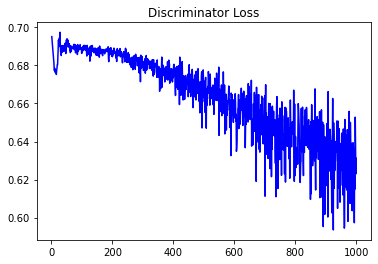

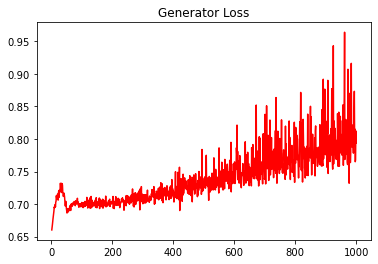

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.454395443059504


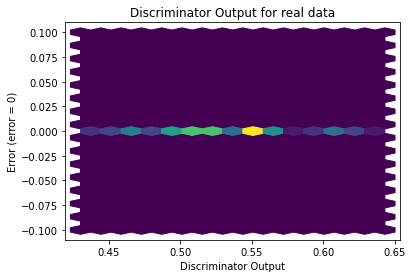

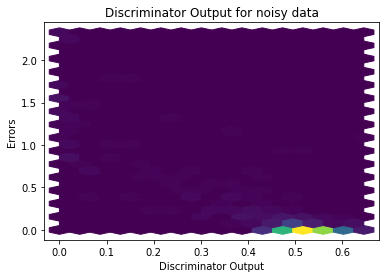

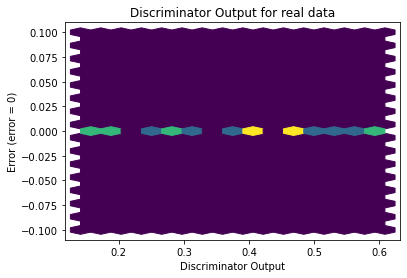

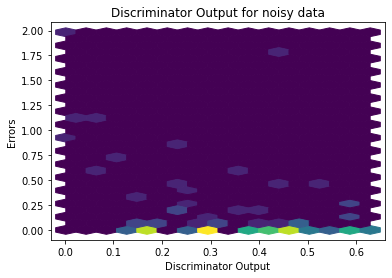

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


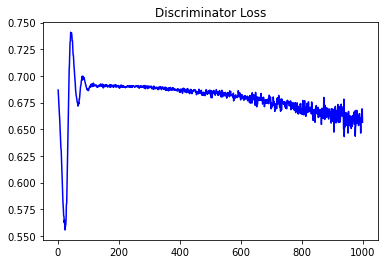

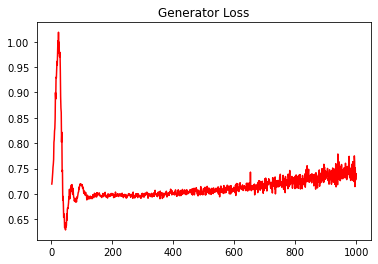

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.31994469223171473


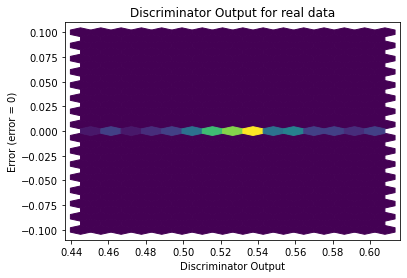

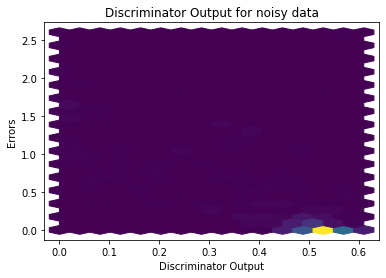

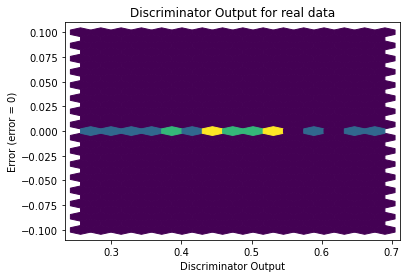

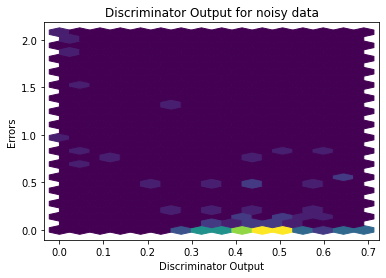

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1767]], requires_grad=True)
